Séries temporais - previsão de demanda comparando o desempenho dos modelos ARIMA, SARIMA e Prophet

In [7]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [8]:
# Carregar dados do Kaggle
data_path = "datasets/train.csv"  # Caminho para o arquivo baixado do Kaggle
data = pd.read_csv(data_path, parse_dates=['date'], index_col='date')

In [9]:
# Filtrar dados para simplificar (ex.: uma única loja)
store_id = 1  # Escolha uma loja específica
data = data[data['store_nbr'] == store_id][['sales']]

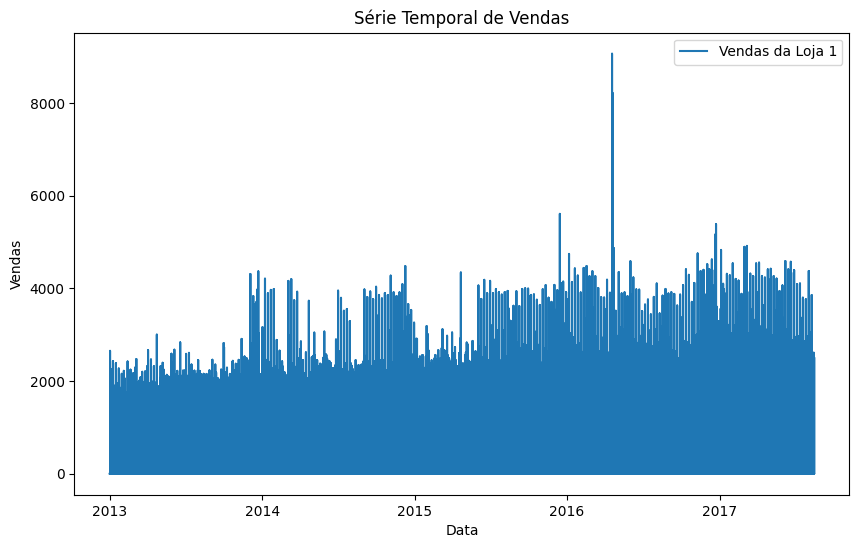

In [10]:
# Visualizar os dados
plt.figure(figsize=(10, 6))
plt.plot(data, label=f'Vendas da Loja {store_id}')
plt.title('Série Temporal de Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.savefig('sales_series.png')
plt.show()

In [11]:
# Dividir os dados em treino e teste
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [12]:
# Função para calcular métricas
def evaluate_model(model_name, predictions, actual):
    mse = mean_squared_error(actual, predictions)
    print(f"{model_name} - Erro Quadrático Médio (MSE): {mse:.2f}")
    return mse

In [13]:
# Modelo 1: ARIMA
print("Treinando modelo ARIMA...")
arima_model = ARIMA(train, order=(5, 1, 0))  # Parâmetros (p, d, q)
arima_fit = arima_model.fit()
arima_predictions = arima_fit.forecast(steps=len(test))
arima_mse = evaluate_model("ARIMA", arima_predictions, test)

Treinando modelo ARIMA...


c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA - Erro Quadrático Médio (MSE): 602704.42


c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
# Modelo 2: SARIMA (com sazonalidade)
print("Treinando modelo SARIMA...")
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 7))  # Sazonalidade semanal
sarima_fit = sarima_model.fit(disp=False)
sarima_predictions = sarima_fit.forecast(steps=len(test))
sarima_mse = evaluate_model("SARIMA", sarima_predictions, test)

c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Treinando modelo SARIMA...


c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA - Erro Quadrático Médio (MSE): 651192.21


In [15]:
# Modelo 3: Prophet (Facebook Prophet)
print("Treinando modelo Prophet...")
prophet_data = data.reset_index().rename(columns={'date': 'ds', 'sales': 'y'})
prophet_train = prophet_data.iloc[:train_size]
prophet_test = prophet_data.iloc[train_size:]

prophet_model = Prophet()
prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')  # Frequência diária
forecast = prophet_model.predict(future)
prophet_predictions = forecast['yhat'].iloc[-len(test):].values
prophet_mse = evaluate_model("Prophet", prophet_predictions, test.values.flatten())


Treinando modelo Prophet...


10:30:48 - cmdstanpy - INFO - Chain [1] start processing
10:31:01 - cmdstanpy - INFO - Chain [1] done processing


Prophet - Erro Quadrático Médio (MSE): 558132.24


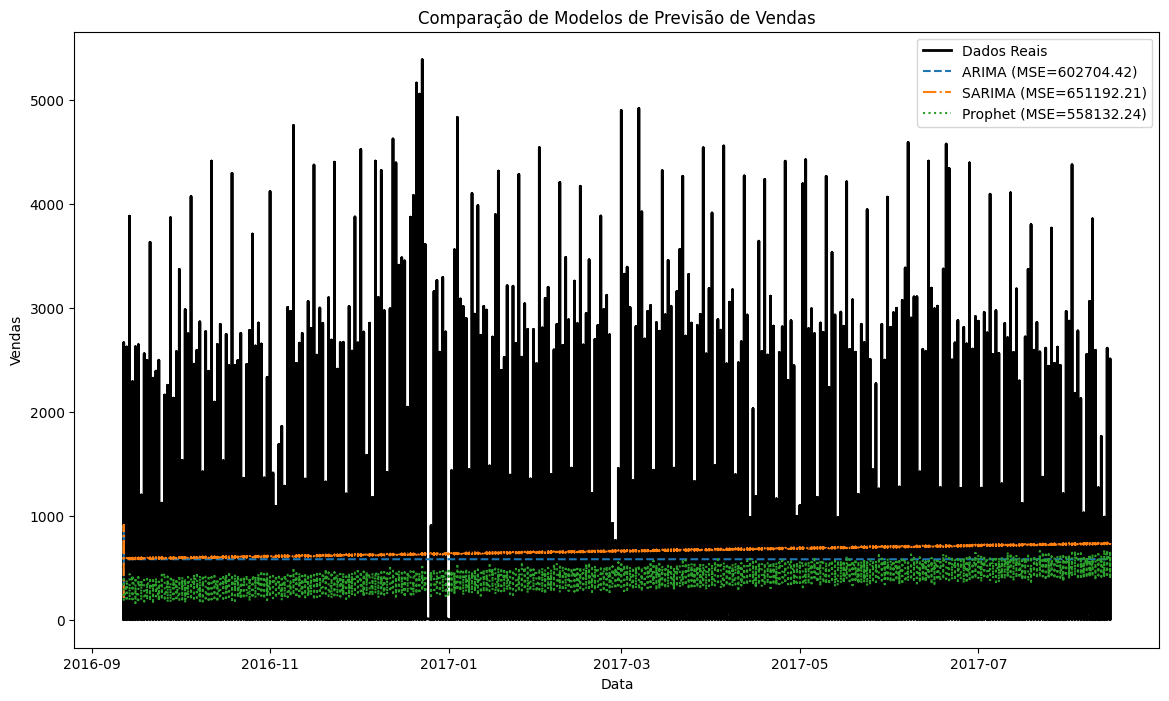

In [16]:
# Plotar comparação dos modelos
plt.figure(figsize=(14, 8))
plt.plot(test.index, test, label='Dados Reais', color='black', linewidth=2)
plt.plot(test.index, arima_predictions, label=f'ARIMA (MSE={arima_mse:.2f})', linestyle='--')
plt.plot(test.index, sarima_predictions, label=f'SARIMA (MSE={sarima_mse:.2f})', linestyle='-.')
plt.plot(test.index, prophet_predictions, label=f'Prophet (MSE={prophet_mse:.2f})', linestyle=':')
plt.title('Comparação de Modelos de Previsão de Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.savefig('model_comparison.png')
plt.show()

In [17]:
# Resumo dos resultados
results = {
    "Modelo": ["ARIMA", "SARIMA", "Prophet"],
    "Erro Quadrático Médio (MSE)": [arima_mse, sarima_mse, prophet_mse]
}
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
print(results_df)


Resumo dos Resultados:
    Modelo  Erro Quadrático Médio (MSE)
0    ARIMA                602704.417696
1   SARIMA                651192.205046
2  Prophet                558132.235344
